In [2]:
import utils.s3ops as s3ops

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
bucket_name = "strava-raw"

streams = s3ops.load_table(bucket_name, "streams.json")

In [4]:
def get_philly_data():
    """
    """
    latlon_data = {"xs": [], "ys": []}

    for key, obj in streams.items():
        if 'latlng' in obj:
            y, x = np.transpose(obj['latlng']['data'])
            if np.mean(x) > -75.4 and np.mean(x) < -75 and np.mean(y) > 39.6:
                latlon_data['xs'].append(x)
                latlon_data['ys'].append(-1 * y)
    return latlon_data


def latlon_to_imshow(latlon_data):
    """
    """
    hist, _, _ = np.histogram2d(
        np.hstack(latlon_data['ys']),
        np.hstack(latlon_data['xs']),
        bins=125)

    return np.log(hist + .01)

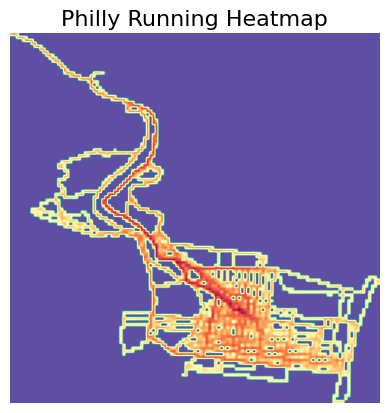

In [7]:
latlon = get_philly_data()
img_data = latlon_to_imshow(latlon)

# inferno
plt.imshow(img_data, cmap="Spectral_r")
plt.tick_params(left=False, bottom=False)
plt.axis('off')
plt.title("Philly Running Heatmap", fontsize=16)
plt.show()